## K-Means Algorithm

In [1]:
from math import sqrt
import random

def readfile(filename):
    lines = [line for line in file(filename)]

  # First line is the column titles
    colnames = lines[0].strip().split('\t')[1:]
    rownames = []
    data = []
    for line in lines[1:]:
        p = line.strip().split('\t')
    # First column in each row is the rowname
        rownames.append(p[0])
    # The data for this row is the remainder of the row
        data.append([float(x) for x in p[1:]])
    return (rownames, colnames, data)

In [2]:
blognames,words,data=readfile('blogdata.txt')

In [3]:
def pearson(v1, v2):
  # Simple sums
    sum1 = sum(v1)
    sum2 = sum(v2)

  # Sums of the squares
    sum1Sq = sum([pow(v, 2) for v in v1])
    sum2Sq = sum([pow(v, 2) for v in v2])

  # Sum of the products
    pSum = sum([v1[i] * v2[i] for i in range(len(v1))])

  # Calculate r (Pearson score)
    num = pSum - sum1 * sum2 / len(v1)
    den = sqrt((sum1Sq - pow(sum1, 2) / len(v1)) * (sum2Sq - pow(sum2, 2)
               / len(v1)))
    if den == 0:
        return 0

    return 1.0 - num / den

In [4]:
def kmeans(rows, distance=pearson, k=4):
  # Determine the minimum and maximum values for each point
    ranges = [(min([row[i] for row in rows]), max([row[i] for row in rows]))
              for i in range(len(rows[0]))]

  # Create k randomly placed centroids
    clusters = [[random.random() * (ranges[i][1] - ranges[i][0]) + ranges[i][0]
                for i in range(len(rows[0]))] for j in range(k)]

    lastmatches = None
    for t in range(100):
        print 'Iteration %d' % t
        bestmatches = [[] for i in range(k)]

    # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row = rows[j]
            bestmatch = 0
            for i in range(k):
                d = distance(clusters[i], row)
                if d < distance(clusters[bestmatch], row):
                    bestmatch = i
            bestmatches[bestmatch].append(j)

    # If the results are the same as last time, this is complete
        if bestmatches == lastmatches:
            break
        lastmatches = bestmatches

    # Move the centroids to the average of their members
        for i in range(k):
            avgs = [0.0] * len(rows[0])
            if len(bestmatches[i]) > 0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m] += rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j] /= len(bestmatches[i])
                clusters[i] = avgs

    return bestmatches

In [5]:
kmean_result = kmeans(data, distance=pearson, k=10)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


In [6]:
print [blognames[id] for id in kmean_result[0]]

['Joystiq', 'Download Squad', 'CoolerHeads Prevail', 'The Unofficial Apple Weblog (TUAW)']


In [7]:
def tanamoto(v1, v2):
    (c1, c2, shr) = (0, 0, 0)

    for i in range(len(v1)):
        if v1[i] != 0:  # in v1
            c1 += 1
        if v2[i] != 0:  # in v2
            c2 += 1
        if v1[i] != 0 and v2[i] != 0:  # in both
            shr += 1

    return 1.0 - float(shr) / (c1 + c2 - shr)

## Multi-Dimensional Scaling 視覺化
https://en.wikipedia.org/wiki/Multidimensional_scaling 

In [8]:
def Multi_Dimensional_Scaling(data, distance=pearson, rate=0.01):
    n = len(data)

  # The real distances between every pair of items
    realdist = [[distance(data[i], data[j]) for j in range(n)] for i in
                range(0, n)]

  # Randomly initialize the starting points of the locations in 2D
    loc = [[random.random(), random.random()] for i in range(n)]
    print loc
    
    fakedist = [[0.0 for j in range(n)] for i in range(n)]

    lasterror = None
    for m in range(0, 1000):
    # Find projected distances
        for i in range(n):
            for j in range(n):
                fakedist[i][j] = sqrt(sum([pow(loc[i][x] - loc[j][x], 2)
                                      for x in range(len(loc[i]))]))

    # Move points
        grad = [[0.0, 0.0] for i in range(n)]

        totalerror = 0
        for k in range(n):
            for j in range(n):
                if j == k:
                    continue
        # The error is percent difference between the distances
                errorterm = (fakedist[j][k] - realdist[j][k]) / realdist[j][k]

        # Each point needs to be moved away from or towards the other
        # point in proportion to how much error it has
                grad[k][0] += (loc[k][0] - loc[j][0]) / fakedist[j][k] \
                    * errorterm
                grad[k][1] += (loc[k][1] - loc[j][1]) / fakedist[j][k] \
                    * errorterm

        # Keep track of the total error
                totalerror += abs(errorterm)
        #print totalerror

    # If the answer got worse by moving the points, we are done
        if lasterror and lasterror < totalerror:
            break
        lasterror = totalerror

    # Move each of the points by the learning rate times the gradient
        for k in range(n):
            loc[k][0] -= rate * grad[k][0]
            loc[k][1] -= rate * grad[k][1]

    return loc

In [9]:
Multi_Dimensional_Scaling(data)

[[0.14414485842671765, 0.18141028944017923], [0.7522314281669787, 0.44016773869644765], [0.7955835446262315, 0.7154859631434984], [0.41337960766614956, 0.6618449304241653], [0.3490085282589862, 0.11755936384267962], [0.6905353243444264, 0.520007186235697], [0.2062832898179695, 0.42190041949173596], [0.47797077082107076, 0.784224313514312], [0.4004766411089874, 0.41119938725569216], [0.2352505699567018, 0.6120214643473831], [0.6374894129912592, 0.4940880356853974], [0.8908272054046512, 0.9839727769126019], [0.06412173533811216, 0.9349175154803063], [0.46307197774669595, 0.2516657007038072], [0.20747612154081185, 0.9548698236580606], [0.4741322560165302, 0.04687623622143755], [0.415365385232895, 0.537448821860563], [0.6595324573059129, 0.4875916440000927], [0.5905197739297047, 0.40393447707665764], [0.45017493198229674, 0.2873372060501397], [0.8521444612847393, 0.0861187761746619], [0.010425292486167081, 0.5277628628911593], [0.20041485022374117, 0.42676989181936176], [0.1145133338853302

[[0.4137053248844926, -0.11837075083249944],
 [0.16754772418200306, 0.09791191854153891],
 [0.9359698487981598, 0.9617662014684373],
 [0.03850454598140431, -0.03317575882059603],
 [0.07135680794383685, 0.5039815648904095],
 [0.7694180276890868, 1.2319372214480226],
 [0.30708698910171633, 0.5066622771549976],
 [0.7609153293757945, 1.1088630826695238],
 [0.6320588949002056, 0.728724304091317],
 [0.18415000359954717, 0.17910391685252247],
 [0.6887772792345817, 0.3859598371735307],
 [0.9128030872258338, 0.19657284089534346],
 [-0.2632936440975864, 0.6248143992045114],
 [1.0943079424314817, 0.17908158058685375],
 [0.18067133319257322, 0.6249234379617346],
 [0.0388415727200196, -0.1754605480458472],
 [1.0664210020042146, 0.8530616186304032],
 [1.2100463442997624, 0.376002951933353],
 [0.11715783636188701, -0.10839855094058432],
 [0.5315179378605044, 0.08501939180356383],
 [0.5816913169073039, -0.17428771123796205],
 [0.6742592897356241, 1.1589591041244438],
 [-0.27979355765509906, 0.24542628

In [10]:
for i in range(10):
   print random.random()

0.514778830708
0.470396526839
0.369462053124
0.771661306607
0.855168504823
0.843806548235
0.524631766073
0.676065655643
0.332530412615
0.183504223971


In [11]:
visualized_k_means_result = Multi_Dimensional_Scaling(data)

[[0.4065508317001143, 0.8938055337954641], [0.014820201658441223, 0.37788486274346533], [0.10765269263607447, 0.017928691315221013], [0.760705394046064, 0.3594701515341231], [0.5831278670833588, 0.13827547719132083], [0.4728767154985668, 0.7923294083694276], [0.45390212141952735, 0.09473332367751608], [0.7911880347691393, 0.40635717457375786], [0.40691594830781186, 0.0449874965088376], [0.148189324420559, 0.7991989726510046], [0.5593872851274743, 0.5312715233650102], [0.859372899560728, 0.45151144549474065], [0.23344550930760055, 0.9808517312119599], [0.4709248870705056, 0.5518576486469903], [0.7908185496162824, 0.1261786394432417], [0.7070399533793131, 0.06432980086798257], [0.7403459205547008, 0.4635414417662713], [0.1718080801778078, 0.5287862471266215], [0.5812724193212002, 0.23080557011434], [0.8481346904712521, 0.5964863766478254], [0.06936797634473513, 0.7772025471921831], [0.5683709661787256, 0.8983852788674304], [0.4528718520864716, 0.9680308640137197], [0.826887489728177, 0.6

In [12]:
def draw2d(data, labels, jpeg='mds2d.jpg'):
    img = Image.new('RGB', (2000, 2000), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    for i in range(len(data)):
        x = (data[i][0] + 0.5) * 1000
        y = (data[i][1] + 0.5) * 1000
        draw.text((x, y), labels[i], (100, 0, 0))
    img.save(jpeg, 'JPEG')

In [13]:
from PIL import Image, ImageDraw
draw2d(visualized_k_means_result, blognames)

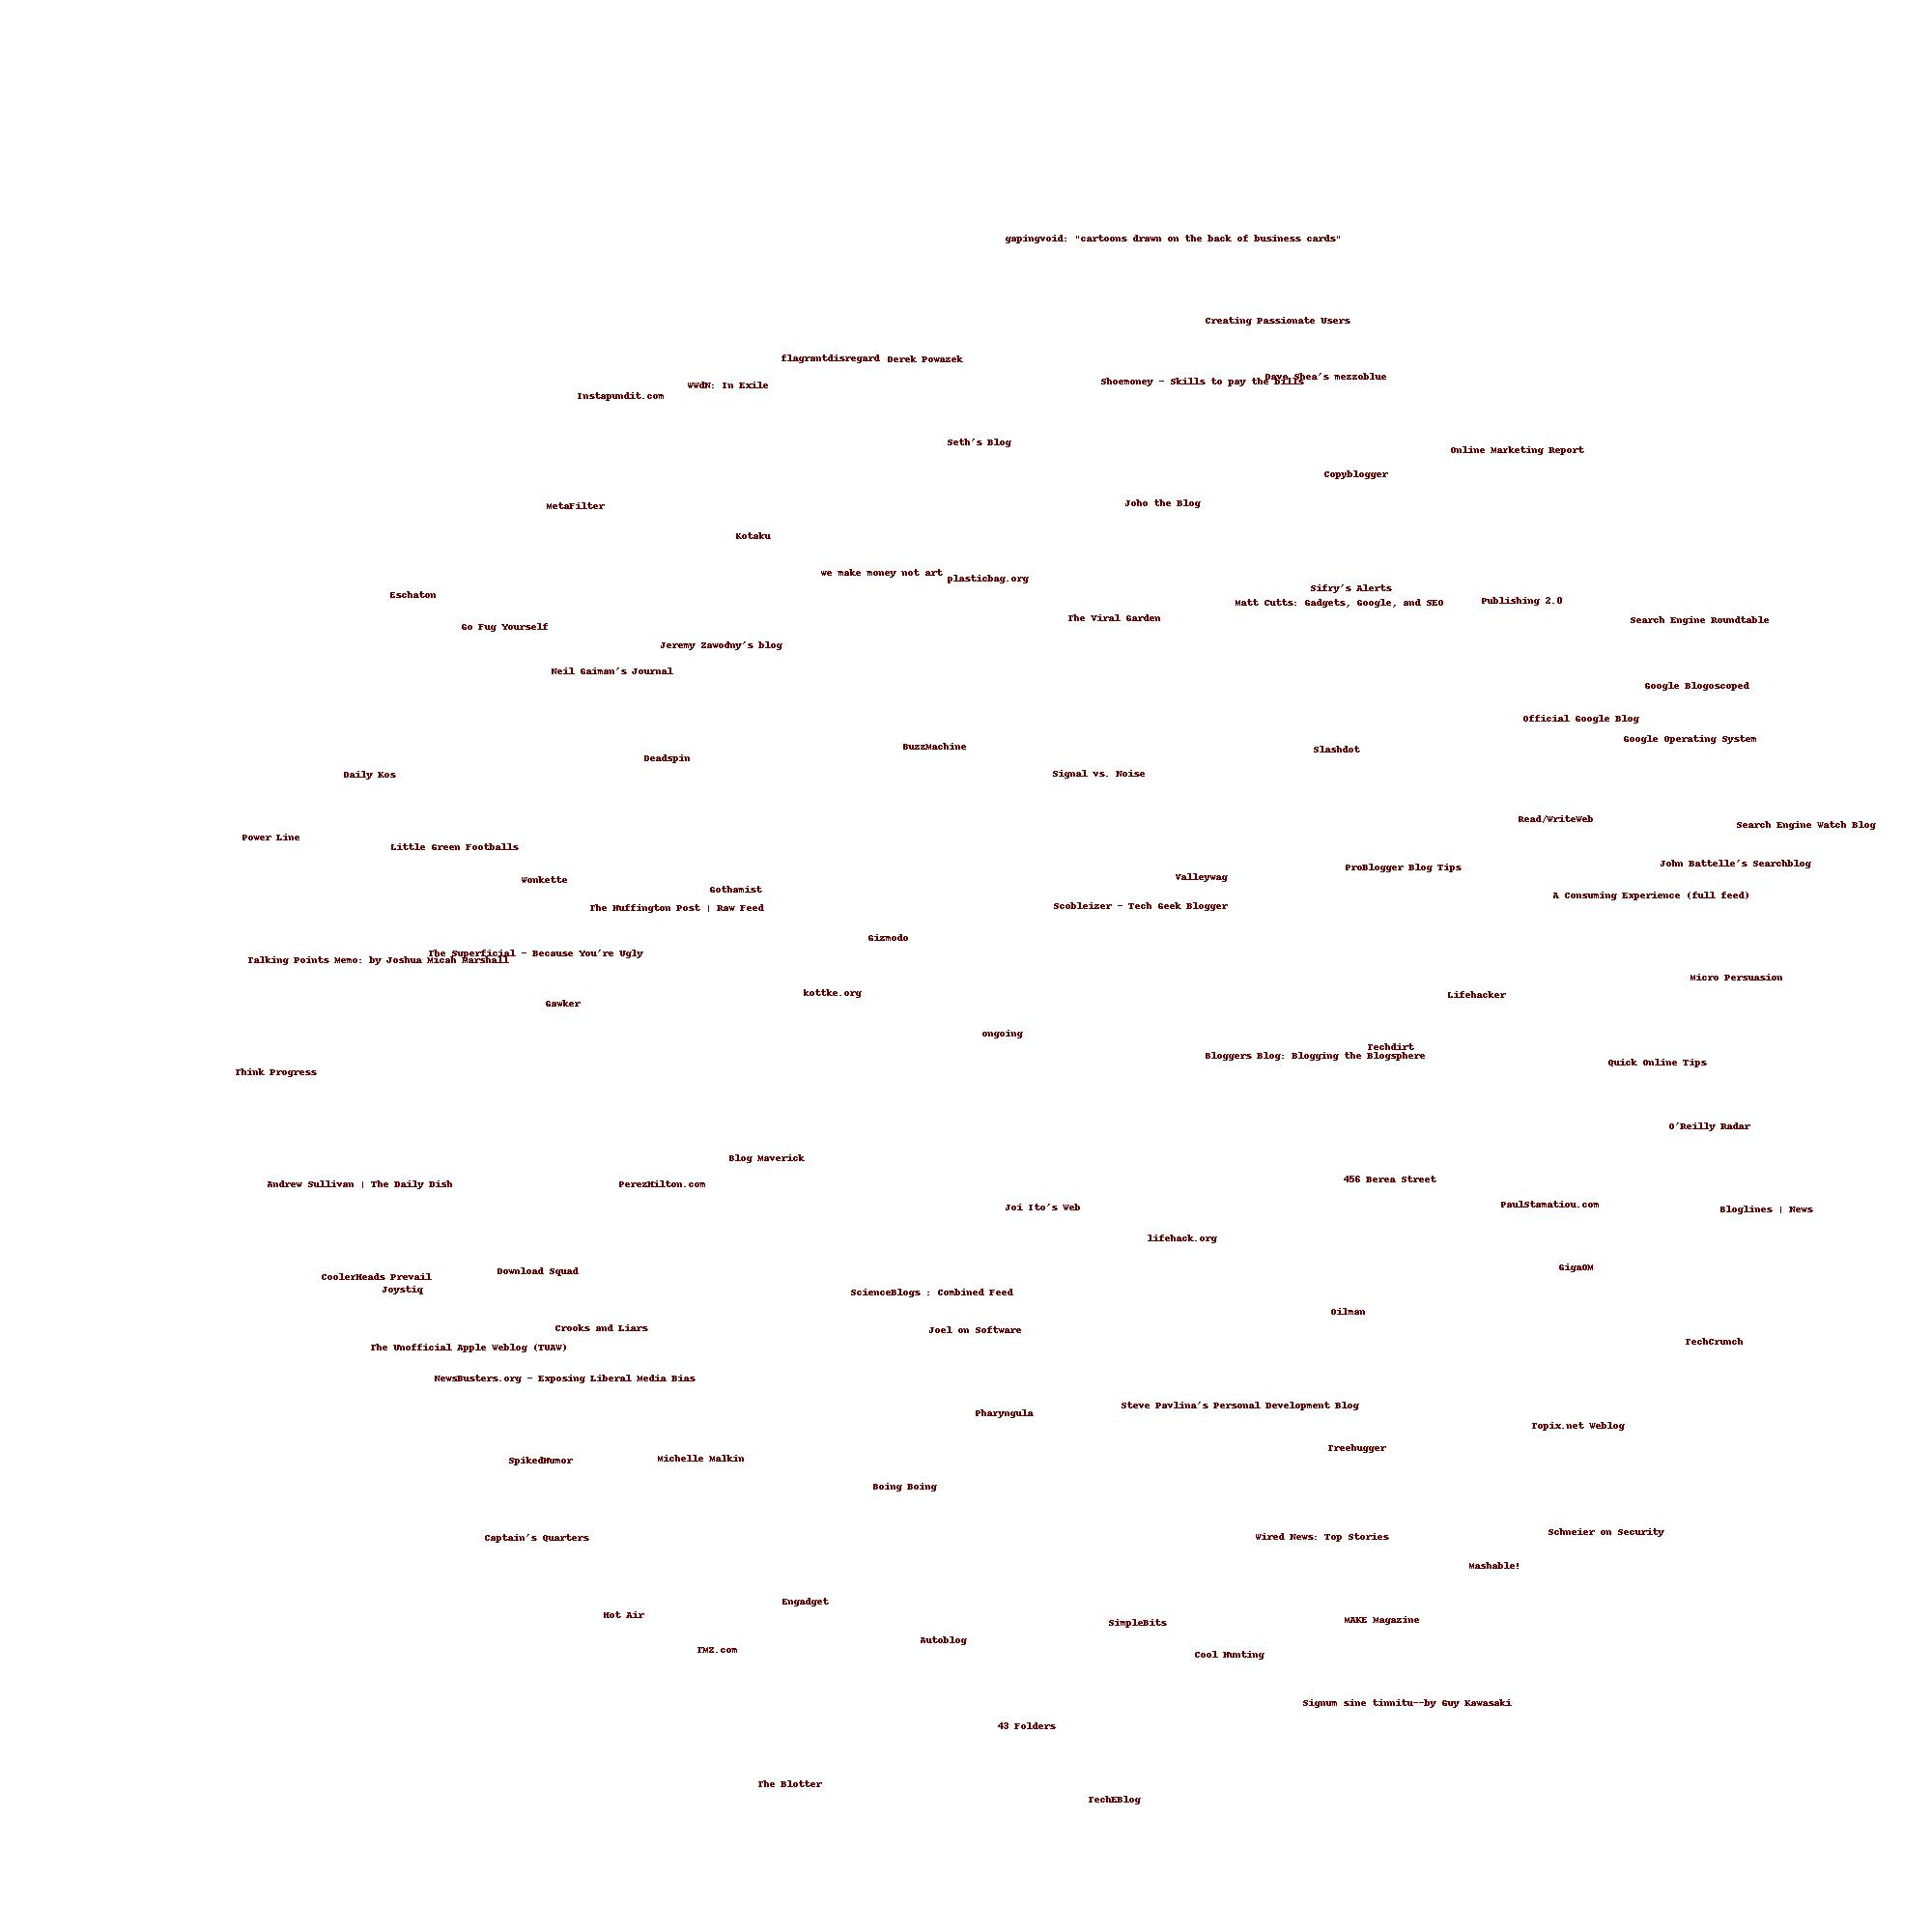

In [14]:
from IPython.display import Image
Image(filename='mds2d.jpg')

In [25]:
dmsdata= [[1,2,3,4], [1,0,0,0], [3,1,2,4], [4,3,2,1]]

In [26]:
Multi_Dimensional_Scaling(dmsdata)

[[0.2750582806430035, 0.9137399622657983], [0.18231744417382023, 0.1450464740961538], [0.31233195756930243, 0.10446569674423134], [0.8813587945878474, 0.6309512673993112]]


[[-0.3999261220710983, 0.9538306348891233],
 [0.8676337630764767, 0.16674486150025516],
 [0.1820434801810654, 0.5893782706991614],
 [1.0013153557875303, 0.08424963341695463]]

In [32]:
example = Multi_Dimensional_Scaling(dmsdata)

[[0.2841986229614861, 0.36434056718531505], [0.4773462209804733, 0.8599033887918317], [0.7828374790263375, 0.5540264861057567], [0.186107016713009, 0.4237997866616927]]


In [33]:
init_loc = [[0.2841986229614861, 0.36434056718531505], [0.4773462209804733, 0.8599033887918317], [0.7828374790263375, 0.5540264861057567], [0.186107016713009, 0.4237997866616927]]

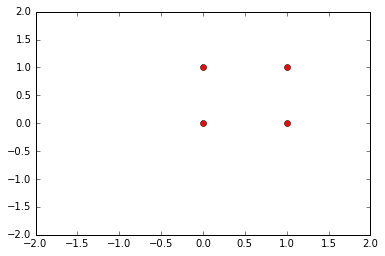

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0,0,1,1], [1,0,1,0], 'ro')
plt.axis([-2, 2, -2, 2])
plt.show()

In [35]:
example

[[0.7321522048965047, -0.3583605072233797],
 [0.2643525481307854, 1.0584585995813103],
 [0.5192870894604874, 0.29448130241927506],
 [0.21469749719352793, 1.2074908339673933]]

In [36]:
x = [i[0] for i in example]
y = [i[1] for i in example]

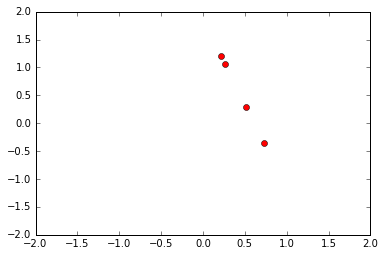

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
plt.axis([-2, 2, -2, 2])
plt.show()

In [21]:
def Visualized_Multi_Dimensional_Scaling(data, distance=pearson, rate=0.01):
    n = len(data)

  # The real distances between every pair of items
    realdist = [[distance(data[i], data[j]) for j in range(n)] for i in
                range(0, n)]

  # Randomly initialize the starting points of the locations in 2D
    loc = [[random.random(), random.random()] for i in range(n)]
    print loc
    
    fakedist = [[0.0 for j in range(n)] for i in range(n)]

    lasterror = None
    for m in range(0, 1000):
    # Find projected distances
        for i in range(n):
            for j in range(n):
                fakedist[i][j] = sqrt(sum([pow(loc[i][x] - loc[j][x], 2)
                                      for x in range(len(loc[i]))]))

    # Move points
        grad = [[0.0, 0.0] for i in range(n)]

        totalerror = 0
        for k in range(n):
            for j in range(n):
                if j == k:
                    continue
        # The error is percent difference between the distances
                errorterm = (fakedist[j][k] - realdist[j][k]) / realdist[j][k]

        # Each point needs to be moved away from or towards the other
        # point in proportion to how much error it has
                grad[k][0] += (loc[k][0] - loc[j][0]) / fakedist[j][k] \
                    * errorterm
                grad[k][1] += (loc[k][1] - loc[j][1]) / fakedist[j][k] \
                    * errorterm

        # Keep track of the total error
                totalerror += abs(errorterm)
        #print totalerror

    # If the answer got worse by moving the points, we are done
        if lasterror and lasterror < totalerror:
            break
        lasterror = totalerror

    # Move each of the points by the learning rate times the gradient
        for k in range(n):
            loc[k][0] -= rate * grad[k][0]
            loc[k][1] -= rate * grad[k][1]

    return loc